In [24]:
import pandas as pd
import re
import numpy as np
import _pickle as pickle
from tqdm import tqdm_notebook as tqdm

# Creating fake profiles

In [ ]:
df = pd.read_csv('/home/Machine Learning/projects/game-buddy/user-matchmaking/dataset/bios.csv')
df.head()

In [8]:
#assign a variable list of potential features
features = [
    'games',
    'music',
    'movies',
    'jokes'
]

topic_df = pd.DataFrame(columns=features)

In [9]:
#filling the topic_df
for i in topic_df.columns:
    topic_df[i] = np.random.randint(0, 10, df.shape[0])

In [10]:
final_df = pd.concat([df, topic_df], axis=1)

In [63]:
final_df

,bios,games,music,movies,jokes
0,Hipster-friendly explorer. Beer trailblazer. I...,4,9,4,4
1,Lifelong music scholar. Typical zombie evangel...,6,5,9,9
2,Writer. Friendly twitter scholar. Hardcore rea...,7,5,2,4
3,Pop culture buff. Reader. Certified gamer. Web...,8,9,6,8
4,General organizer. Troublemaker. Certified alc...,7,7,0,5
...,...,...,...,...,...
6820,Food geek. Web fanatic. Music evangelist. Pass...,1,9,9,7
6821,Lifelong beer expert. Alcohol advocate. Thinke...,3,9,7,8
6822,Devoted problem solver. Typical bacon ninja. W...,8,6,7,4
6823,Coffeeaholic. Travel fan. Infuriatingly humble...,1,2,1,4


In [12]:
with open('profiles.pkl', 'wb') as f:
    pickle.dump(final_df, f)

# NLP on the profiles
### 1. Tokenize

In [13]:
#load the data from profiles.pkl
with open('profiles.pkl', 'rb') as f:
    df = pickle.load(f)

In [39]:
#import lemmatizer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [42]:
#instaniate lemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [58]:
# tokenize the text with function
def tokenize(text):
    #remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    #remove numbers
    text = re.sub(r'\d+', '', text)
    #remove stopwords
    stop = stopwords.words('english')
    text = [word for word in text.split() if word not in stop]
    #lemmatize
    text = [lemmatizer.lemmatize(word) for word in text]
    return text
    

In [60]:
def tokenize_v2(text):
    """
    Tokenizing the bios, then lemmatizing them
    """
    # Creating a library of stopwords
    stops = stopwords.words('english')
    
    # Lowercasing the words
    text = text.lower()
    
    # Removing the punctuations (periods)
    text = text.replace('.', '')
    
    # Splitting on spaces between words
    text = text.split(' ')
    #print(text)
    
    # Lemmatizing the words and removing stop words
    text = [lemmatizer.lemmatize(i) for i in text if i not in stops]
    
    return text

In [61]:
print(tokenize('I like to play games, listen to music, watch movies, and tell jokes.'))
print(tokenize_v2('I like to play games, listen to music, watch movies, and tell jokes.'))

['I', 'like', 'play', 'game', 'listen', 'music', 'watch', 'movie', 'tell', 'joke']
['like', 'play', 'games,', 'listen', 'music,', 'watch', 'movies,', 'tell', 'joke']


In [65]:
# apply the tokenize function to each bios
final_df['bios'] = df['bios'].apply(tokenize_v2)

In [66]:
final_df.head()

,bios,games,music,movies,jokes
0,"[hipster-friendly, explorer, beer, trailblazer...",4,9,4,4
1,"[lifelong, music, scholar, typical, zombie, ev...",6,5,9,9
2,"[writer, friendly, twitter, scholar, hardcore,...",7,5,2,4
3,"[pop, culture, buff, reader, certified, gamer,...",8,9,6,8
4,"[general, organizer, troublemaker, certified, ...",7,7,0,5


In [ ]:
# create a list of unique words
unique_words = set()

# itearate through each row of the bios column
for bio in final_df['bios']:
    unique_words.update(bio)

# print the number of unique words
print("Number of unique word: " + str(len(unique_words)))

# determine the frequency of word in bios
words = []

# add all words to the words
for bio in final_df['bios']:
    words.extend(bio)

#determine the frequency of each word
bio_freq = FreqDist(words)
bio_freq.most_common(104)

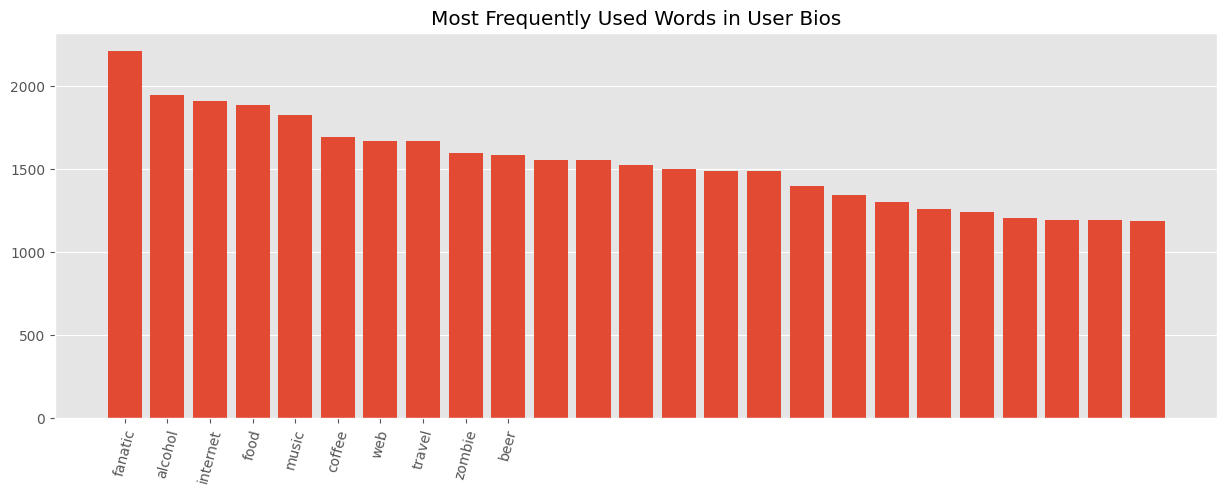

In [79]:
# plotting the most frequent used words
import matplotlib.pyplot as plt
import seaborn as sns

# set the figure size
plt.style.use('ggplot')
plt.figure(figsize=(15, 5))

# plot the most frequent words
'''sns.barplot(x=[i[0] for i in bio_freq.most_common(10)], y=[i[1] for i in bio_freq.most_common(10)])
plt.title('Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()'''

# set the title and labels
plt.bar(*zip(*bio_freq.most_common(25)))
plt.xticks(rotation=75)
plt.title('Most Frequently Used Words in User Bios')
plt.show()

In [80]:
#Instaniate the bigram collocation finder
bigram_measures = BigramAssocMeasures()

# create a bigram collocation finder
bio_finder = BigramCollocationFinder.from_words(words)

#finding the frequence of bigrams
bio_scored = bio_finder.score_ngrams(bigram_measures.raw_freq)

#sorting the bigrams by frequency
#bio_scored = sorted(bio_scored, key=lambda x: x[1], reverse=True)
bio_scored[:50]

# create a list of bigrams
bigrams = list(map(lambda x: x[0][0] + ' ' + x[0][1], bio_scored[:50]))

# create a list of bigram frequency scores
bio_scores = list(map(lambda x: x[1], bio_scored[:50]))

# combine the bigrams and scores into a dictionary
bigrams = list(zip(bigrams, bio_scores))

# create a dataframe of bigrams and scores
bigram_df = pd.DataFrame(bigrams, columns=['bigram', 'score'])
#bigram_df

,bigram,score
0,pop culture,0.017392
1,social medium,0.016349
2,subtly charming,0.010177
3,problem solver,0.008385
4,infuriatingly humble,0.006851
5,fit apathy,0.003057
6,prone fit,0.003057
7,alcohol fanatic,0.003033
8,animal everywhere,0.002940
9,friend animal,0.002940


<AxesSubplot: xlabel='bigram', ylabel='score'>

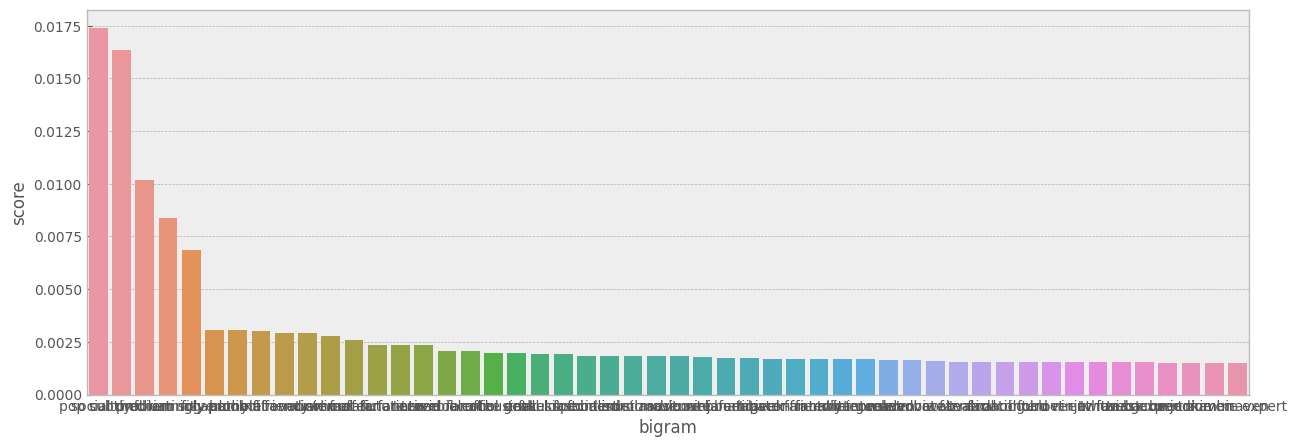

In [83]:
plt.style.use('bmh')
plt.figure(figsize=(15, 5))

# plot the most frequent words
sns.barplot(x='bigram', y='score', data=bigram_df)

In [ ]:
plt.bar(*zip(*bio_scored[:25]))
plt.xticks(rotation=75)
plt.title('Most Frequently Used Bigrams in User Bios')
plt.show()